In [29]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

#### Подключение к базе данных

In [30]:
try:
    conn = sqlite3.connect('../data/checking-logs.sqlite')
    print("Успешное подключение к базе данных.")
except sqlite3.Error as e:
    print(f"Ошибка при подключении к базе данных: {e}")
    exit()

Успешное подключение к базе данных.


#### Даты, когда были и просмотры, и коммиты project1

In [31]:
query_commits = """
    SELECT 
        uid,
        timestamp,
        numTrials
    FROM checker 
    WHERE
        uid LIKE 'user_%'
        AND labname LIKE 'project1'
        AND status LIKE 'ready'
"""
df = pd.read_sql_query(query_commits, conn, parse_dates=['timestamp'])
df

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


### Построение графика

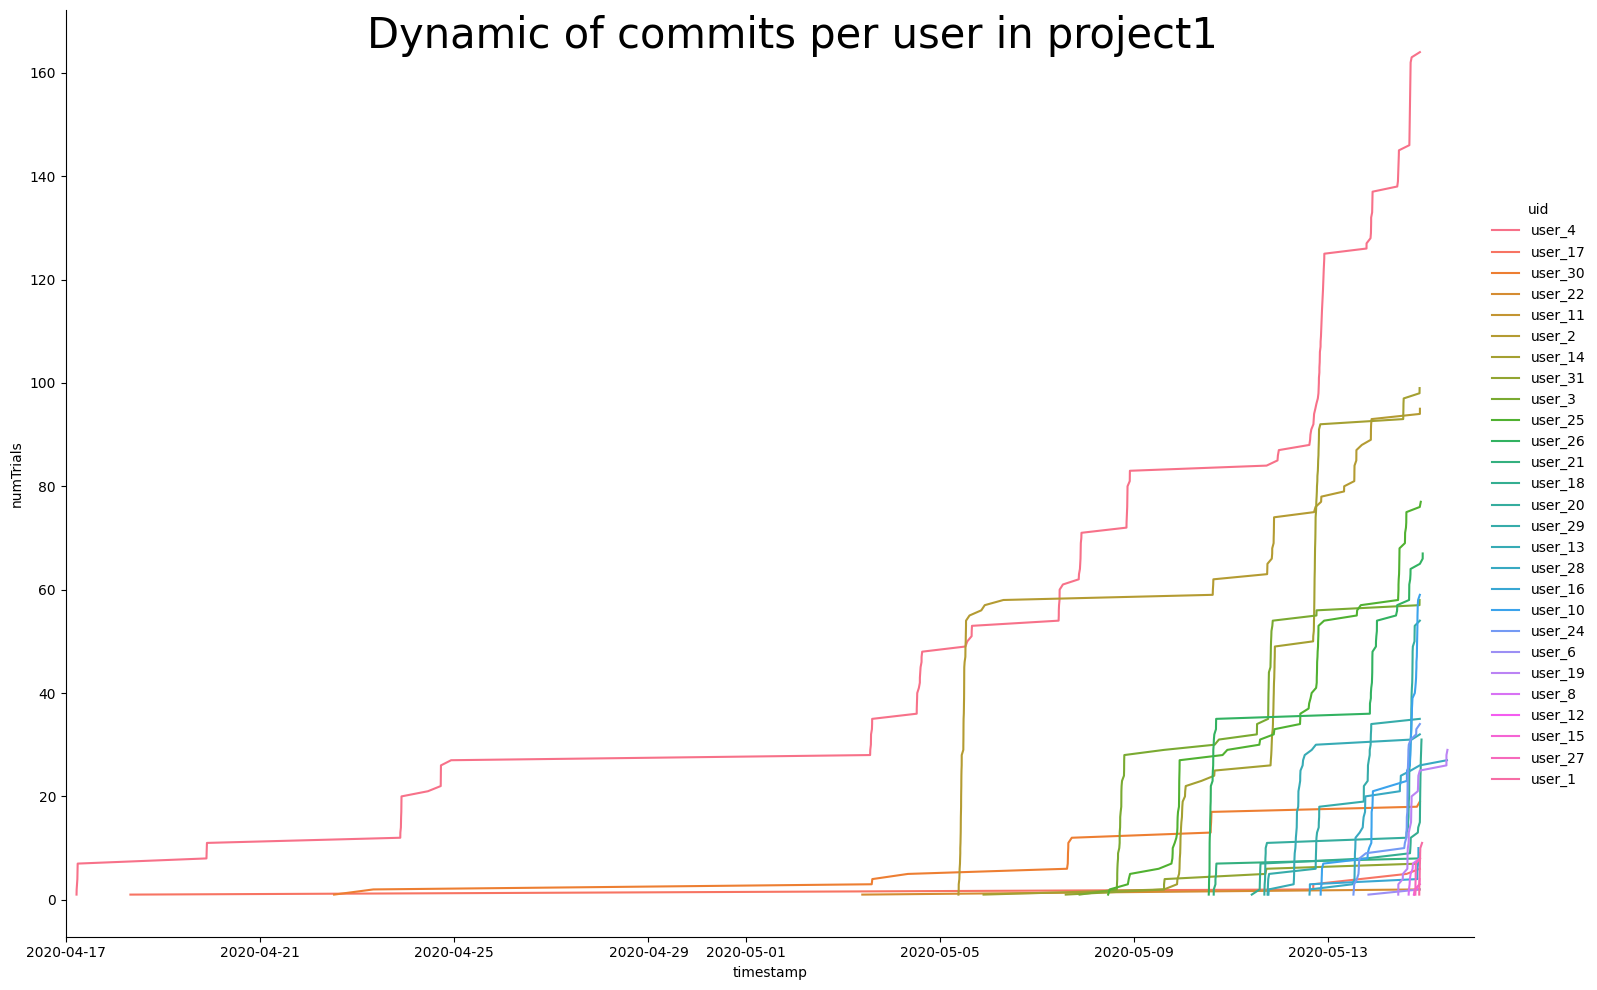

In [32]:
# Преобразуем столбец timestamp в формат datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Создаем график
g = sns.relplot(
    x='timestamp', 
    y='numTrials', 
    hue='uid', 
    kind='line',  # Тип графика: линейный
    data=df,
    aspect=1.5,     # Соотношение сторон графика
    height=10,      # Высота графика
    legend='full'
)

plt.xlim(pd.to_datetime('2020-04-17'), pd.to_datetime('2020-05-16'))

# Добавляем подписи
g.fig.suptitle('Dynamic of commits per user in project1', fontsize=30)
plt.show()

### Какой пользователь был лидером по количеству коммитов почти все время?
* Ответ: user_4

### Какой пользователь был лидером только короткий промежуток времени?
Ответ: user_2